# Session 1

1. Installation 
2. (You might have to do this) Set KMP_DUPLICATE_LIB_OK to true
3. What we need?
   1. amplitudes
   2. depths in micrometers
   3. times
4. Raster Plot
5. Motion Correction
6. Registered depths

## Installation

(Create python=3.12 environment instead of 3.11 even though they ask you to. Sometimes, matplotlib just doesn't work with 3.11)

```shell
conda create -n dredge python=3.12 numpy scipy h5py tqdm jupyterlab seaborn numba scikit-learn
git clone https://github.com/evarol/dredge.git
cd dredge/
pip install -r requirements.txt
pip install .
```

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from dredge import motion_util, dredge_ap

c:\Users\sangeetha\miniforge3\envs\motion\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Why use `os.environ['KMP_DUPLICATE_OK'] = 'True'`

When libraries like **NumPy** or **TensorFlow** load, they sometimes load **multiple copies** of the OpenMP runtime (`libiomp5md.dll`).

This can cause an error like:

```
OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5md.dll already initialized.
```

This happens because OpenMP expects **only one copy** to be loaded. If it finds duplicates, it **crashes** the program.

Adding:

```python
import os
os.environ['KMP_DUPLICATE_OK'] = 'True'
```

tells OpenMP to **ignore the duplicate** and **continue running**.

🔵 **Note:** This is a quick fix; ideally, we should fix the library conflicts properly.

In [2]:
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

## What we need

This is where we might need to use spikeinterface to get peaks (amplitudes)

https://spikeinterface.github.io/blog/spikeinterface-motion-estimation/

In [3]:
data = np.load('data/dartsort_dataset1_p2_tstart750_tend1500.npz')
data.keys()

KeysView(NpzFile 'data/dartsort_dataset1_p2_tstart750_tend1500.npz' with keys: geom, denoised_amplitudes, times_seconds, depths_um)

In [4]:
amplitudes = data['denoised_amplitudes']
depths = data['depths_um']
times = data['times_seconds']

## Spike Raster (Before Motion Correction)

Text(0, 0.5, 'depth (microns)')

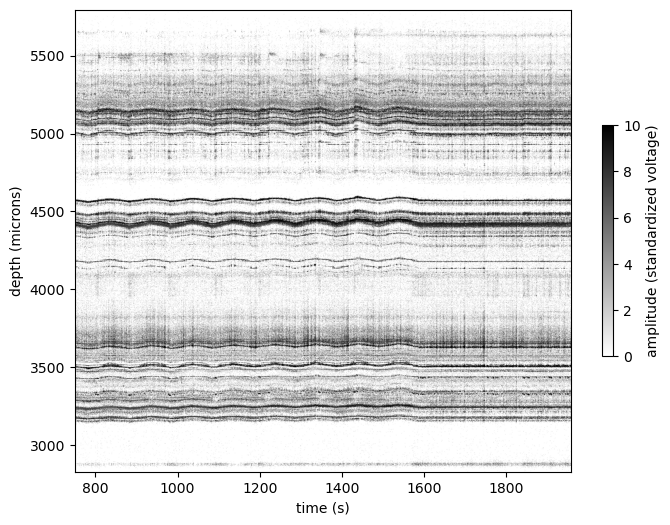

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))
im = motion_util.show_spike_raster(amplitudes, depths, times, ax, aspect="auto", cmap=plt.cm.binary, vmax=10)
plt.colorbar(im[-1], ax=ax, label="amplitude (standardized voltage)", shrink=0.5)
plt.xlabel("time (s)")
plt.ylabel("depth (microns)")

## Motion Correction

In [6]:
motion_est, extra = dredge_ap.register(amplitudes, depths, times)

Solve: 100%|██████████| 6/6 [00:00<00:00,  6.77it/s]


## Registered Depths

In [12]:
registered_depths = motion_est.correct_s(times, depths)

Text(0, 0.5, 'depth (microns)')

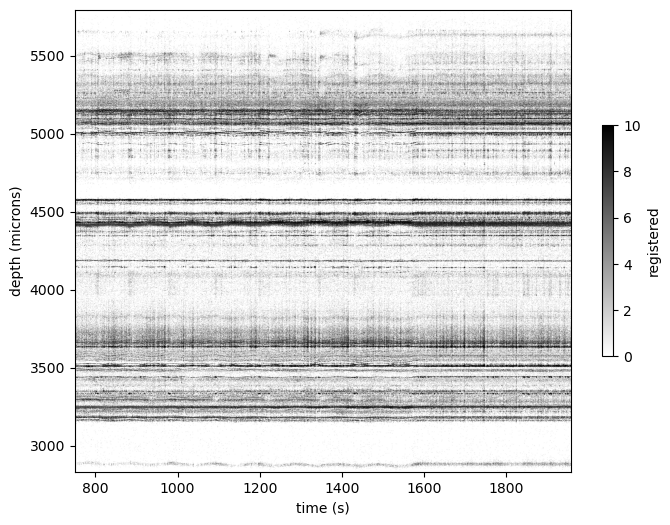

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
im = motion_util.show_spike_raster(amplitudes, registered_depths, times, ax, aspect="auto", cmap=plt.cm.binary, vmax=10)
plt.colorbar(im[-1], ax=ax, label="registered", shrink=0.5)
plt.xlabel("time (s)")
plt.ylabel("depth (microns)")